In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
measures = pd.read_csv('C:/users/bernie/desktop/data_sets/subj_measures.csv')

In [3]:
measures.head()

,date,user_id,type,value
0,2019-06-08T23:19:34.418Z,2348,mood,2.76
1,2019-06-13T16:33:34.399Z,5232,sleep,2.44
2,2018-12-26T14:24:00.436Z,4209,sleep,1.88
3,2019-07-17T20:11:23.792Z,2802,mood,2.20
4,2019-05-09T17:27:50.900Z,2025,mood,4.00


In [4]:
# How many users are in this data set?
id_count = measures.user_id.nunique()
# Which users have the most logs in this data set?
freq_ids = measures.drop_duplicates().user_id.value_counts()


In [5]:
# Create a column for the date in the datetime format
measures= measures.assign(new_ts = pd.to_datetime(measures.loc[:,'date']))

# Create a column for the hour that the person logged their data
measures= measures.assign(hour_measure = measures.new_ts.dt.hour)

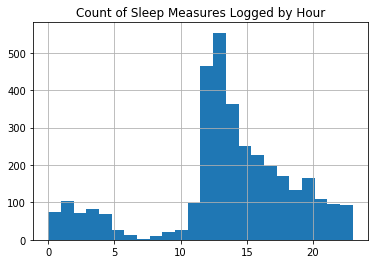

In [6]:
# Let's get an idea of when people are logging different types of emotions
hist_sleep = measures[measures['type'] =='sleep']['hour_measure'].hist(bins=24)
hist_sleep.set_title('Count of Sleep Measures Logged by Hour')
plt.show()

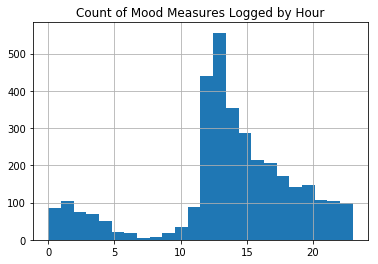

In [7]:
hist_mood = measures[measures['type'] =='mood']['hour_measure'].hist(bins=24)
hist_mood.set_title('Count of Mood Measures Logged by Hour')
plt.show()

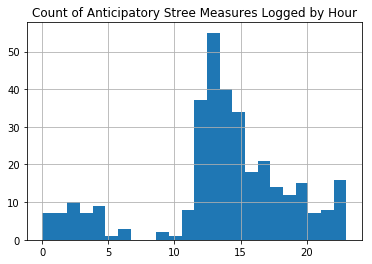

In [8]:
hist_stress = measures[measures['type'] =='anticipatoryStress']['hour_measure'].hist(bins=24)
hist_stress.set_title('Count of Anticipatory Stress Measures Logged by Hour')
plt.show()

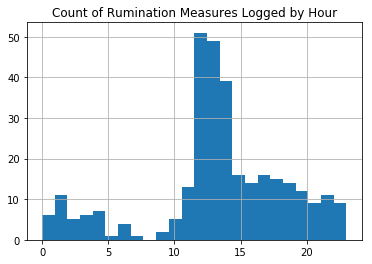

In [9]:
hist_rumination = measures[measures['type'] =='ruminationStress']['hour_measure'].hist(bins=24)
hist_rumination.set_title('Count of Rumination Measures Logged by Hour')
plt.show()

In [10]:
### Analysis
# It seems that no matter the measure being logged the users are inputting them mostly around 12pm - 2pm
# lets look at a singler user and see if we can visual any patterins in their
# rating and the time that they log the measure.
freq_ids[0:4]


2012    539
2802    437
2025    393
1044    279
Name: user_id, dtype: int64

In [11]:
# We will take the user_id 2012 since it has the most number of records in the file
user_2012 =  measures[measures['user_id'] ==2012]

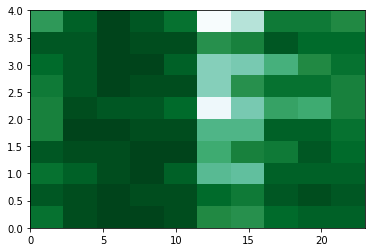

In [12]:

plt.hist2d(user_2012['hour_measure'],user_2012['value'],cmap=plt.cm.BuGn_r)
plt.show()

In [13]:
#The lighter the region the greater the density.
# we can see that once again we have a large number of records in that 12-3 timeframe
# additionally now we can see there are mostly centered around the 3.5-4 and 2-2.5 ranges
# One last thing to look at might be if we can see a change in their ratings over time
# Lets look at the data in terms of months

In [14]:
# Average Score by Month for the User 2012
user_2012 =user_2012.assign(YearMonth = user_2012['new_ts'].dt.to_period('M'))


In [15]:
median_by_YM =user_2012.groupby(['YearMonth'], as_index=False).median()
# Take a look at the time frame ensure that they are in order by date
median_by_YM

,YearMonth,user_id,value,hour_measure
0,2018-09,2012.0,3.120000,12.0
1,2018-10,2012.0,2.337797,13.0
2,2018-11,2012.0,2.307956,15.0
3,2018-12,2012.0,2.400000,14.0
4,2019-01,2012.0,2.217731,13.0
5,2019-02,2012.0,2.359545,14.0
6,2019-03,2012.0,2.000000,13.0
7,2019-04,2012.0,2.282396,14.0
8,2019-05,2012.0,2.681093,14.5
9,2019-06,2012.0,2.143150,13.0


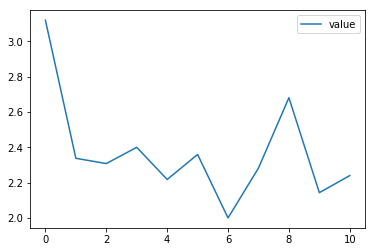

In [16]:
# Create a plot of the median value reported for each month-year
median_by_YM[['YearMonth','value']].plot(kind='line')
plt.show()

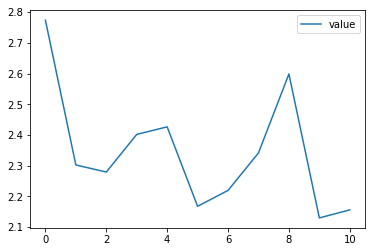

In [17]:
# Create a plot of the mean value reported for each month-year
mean_by_YM =user_2012.groupby(['YearMonth'], as_index=False).mean()
mean_by_YM.head()
mean_by_YM[['YearMonth','value']].plot(kind='line')
plt.show()

In [18]:
# This user seems to have been using this treatment for 10 months
# The mean or the median both seem to show the same pattern
# The drop off between timeframe 8 and 9 is concerning as 9 was the highest
# since the first log in and 9 was one of the lowest by either measure